In [419]:
# Load libraries
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
# Read the country dataset from a CSV file into a DataFrame
df = pd.read_csv("country-data.csv")

# Display the first few rows of the DataFrame
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [421]:
# Calculate the number of unique countries in the dataset
df['country'].nunique()

167

In [422]:
# Making function aims to provide a comprehensive summary of a dataframe by visualising key information

def visualise_dataframe(df):
    # Display dataframe summary
    print("DataFrame Summary:")
    print(df.info())

    # Display number of missing values
    print("\nNumber of Missing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing data")
    else:
        print(missing_values)

    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Visualise missing values
    plt.figure(figsize=(10, 6))
    if missing_values.sum() == 0:
        plt.text(0.4, 0.5, 'No missing data', fontsize=18, color='green', ha='center')
    else:
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values')
    plt.show()

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

Number of Missing Values:
No missing data

Summary Statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.7

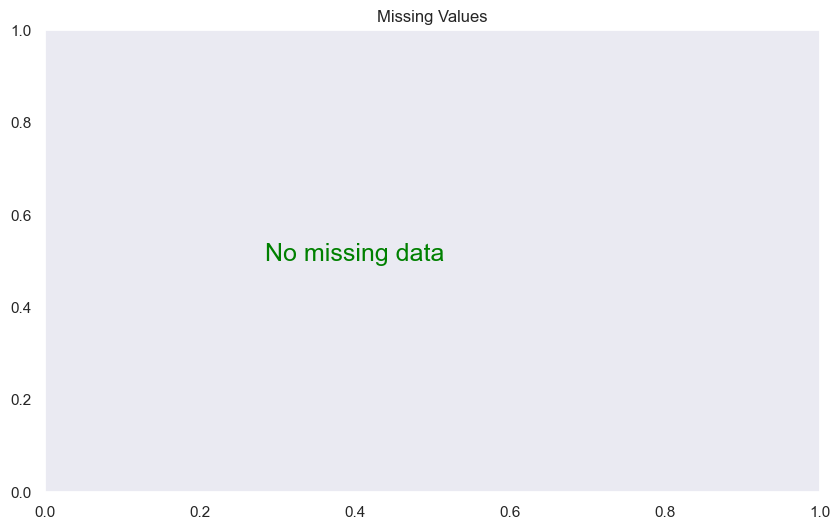

In [423]:
# Using new fucntion to get all the information about DataFrame
visualise_dataframe(df)

In [424]:
# Storing Original Data
original_data = df

In [425]:
# Storing and dropping a non-numeric column 
country_column = df['country']  # Storing country column

df = df.drop('country', axis=1) # Dropping country column

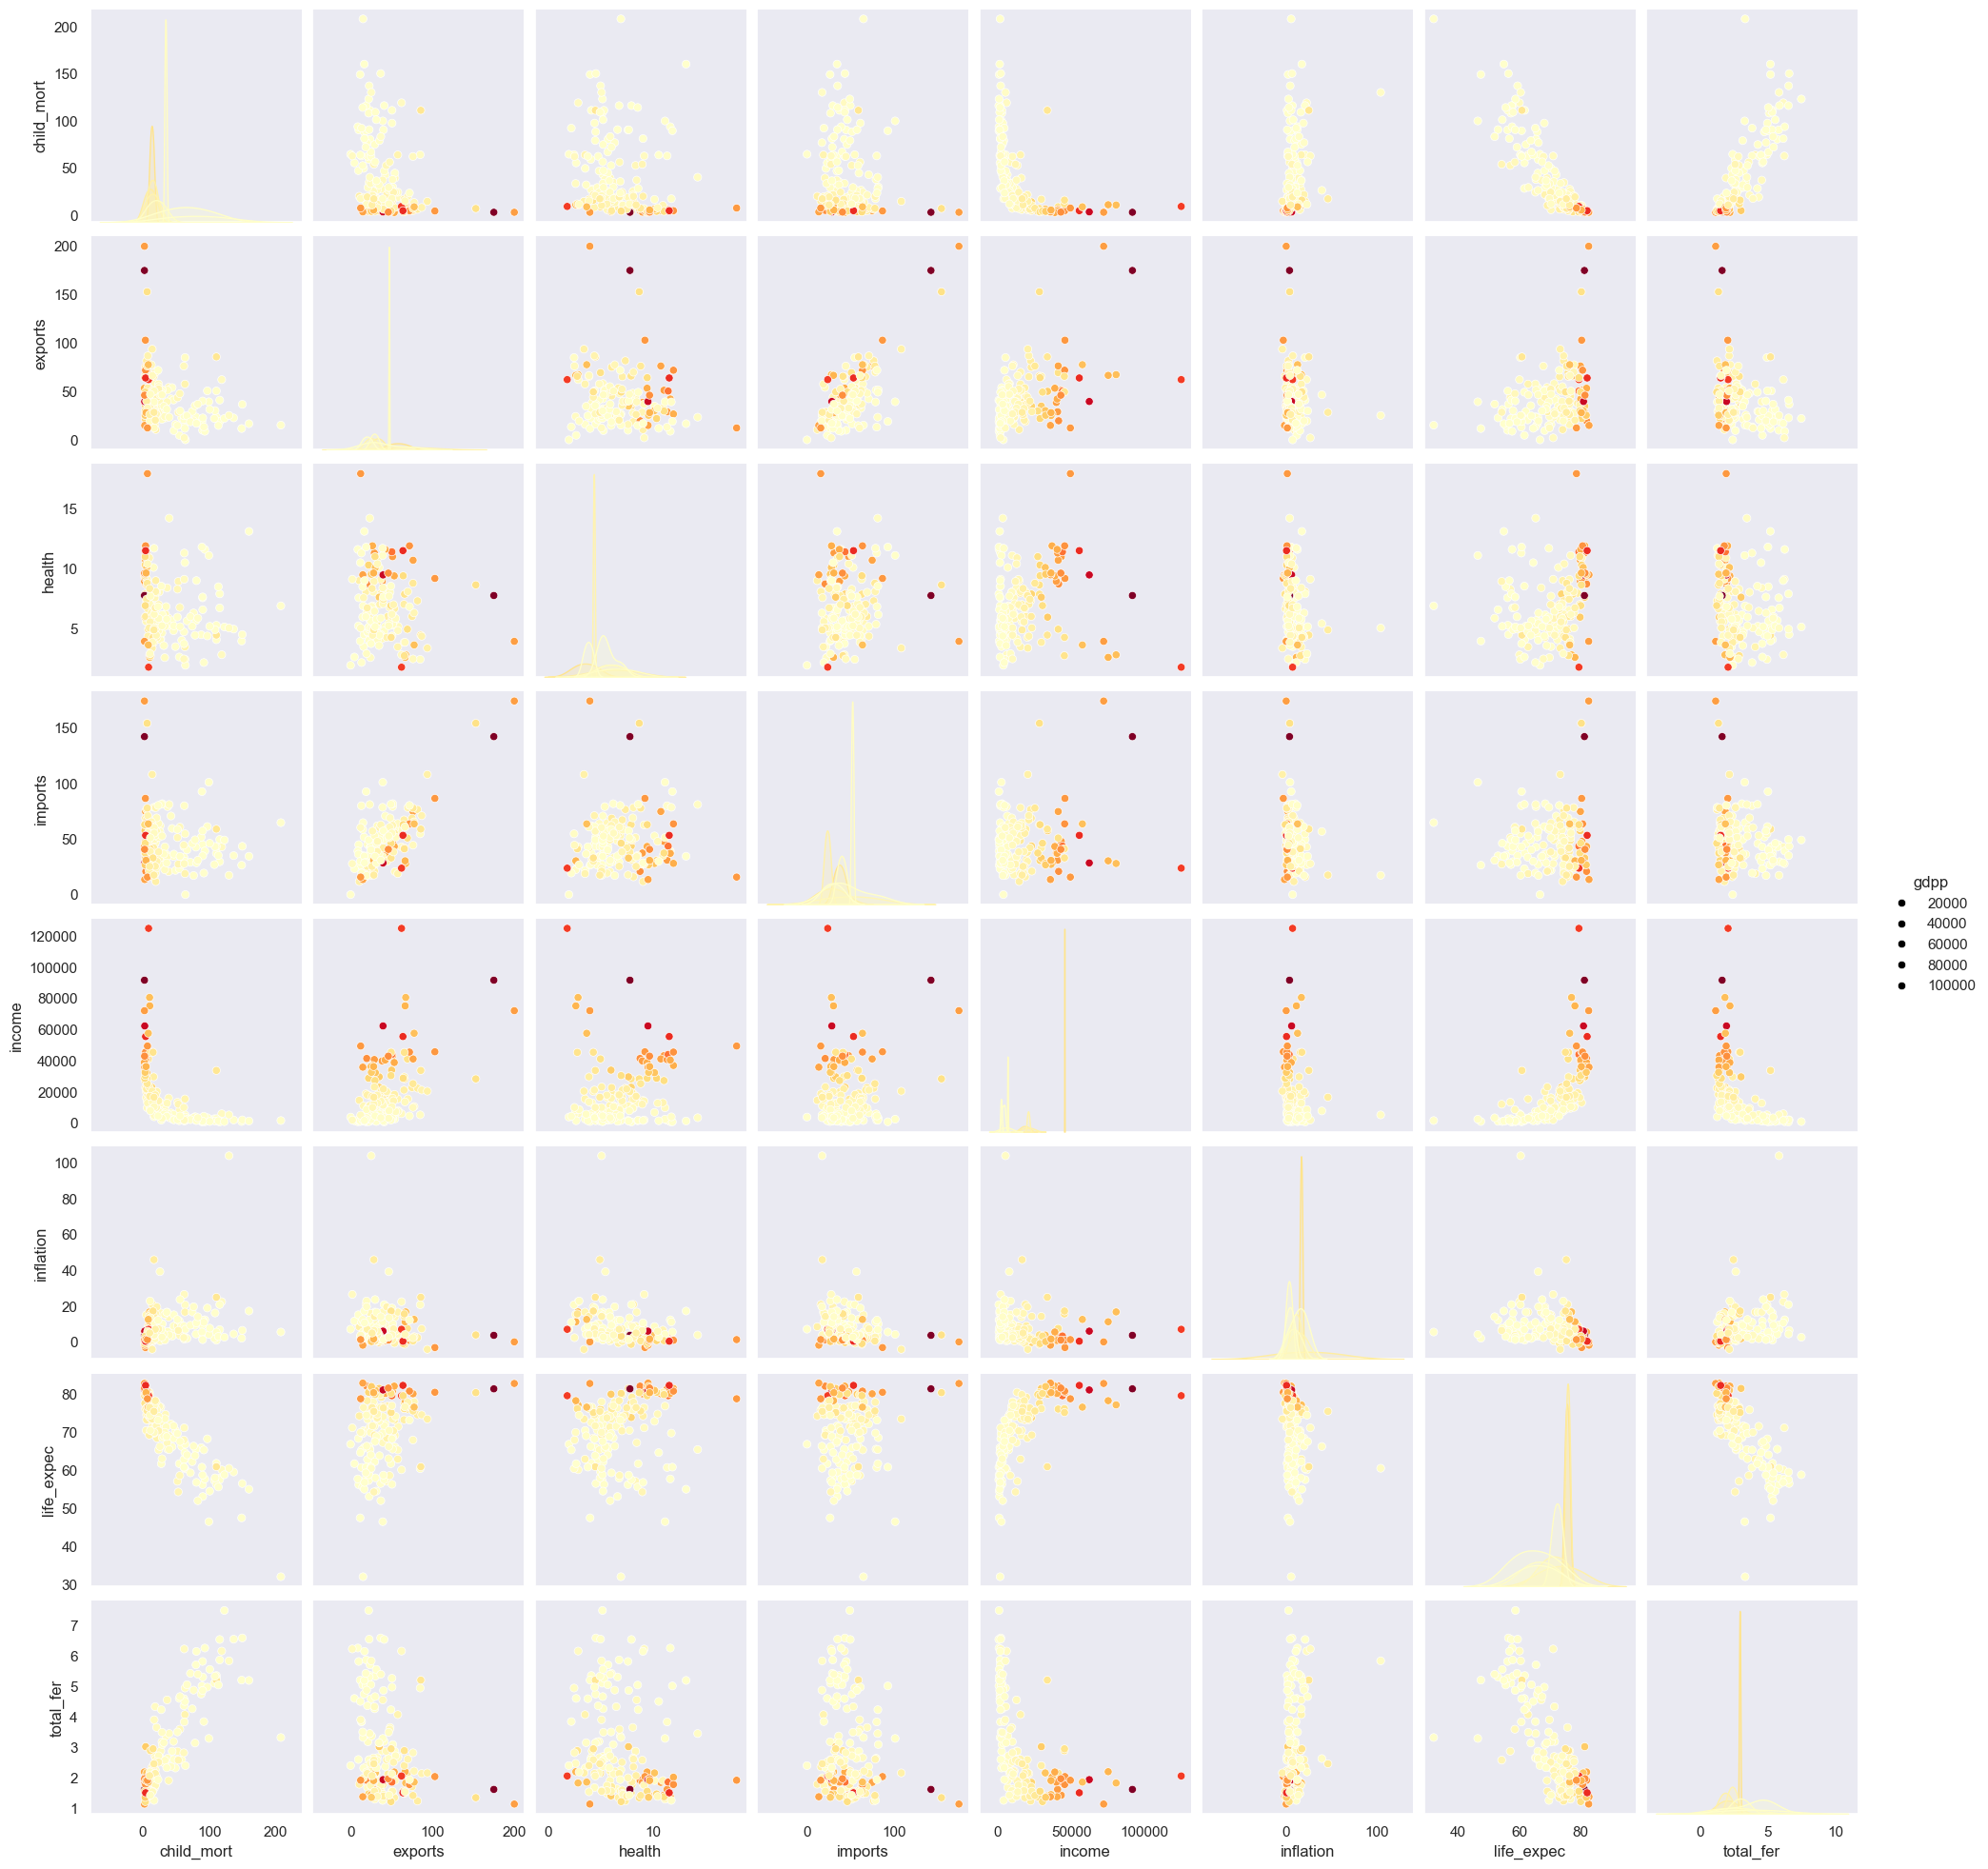

In [426]:
# Set style and palette
sns.set(style="dark")

# Quick visualisation of current data with gdpp as hue
sns.pairplot(df, hue='gdpp', palette='YlOrRd', plot_kws={"facecolor":"black"})

## Iterate over every column in the DataFrame (except 'gdpp') and create a scatter plot comparing each column to the 'gdpp' variable.

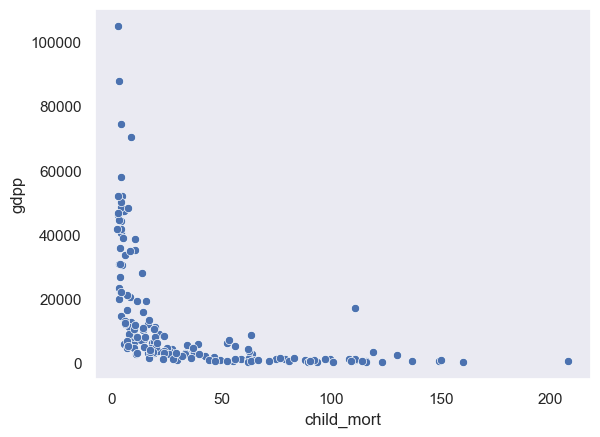

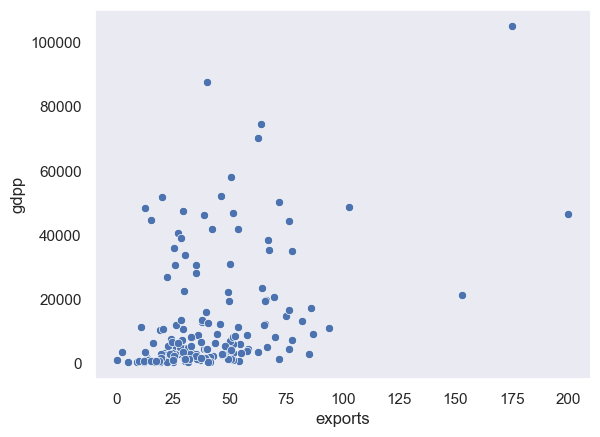

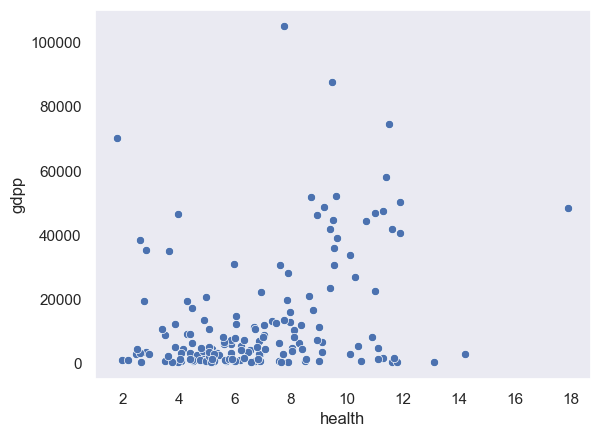

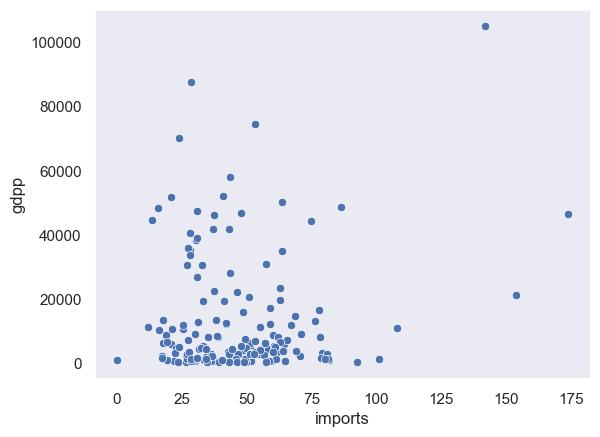

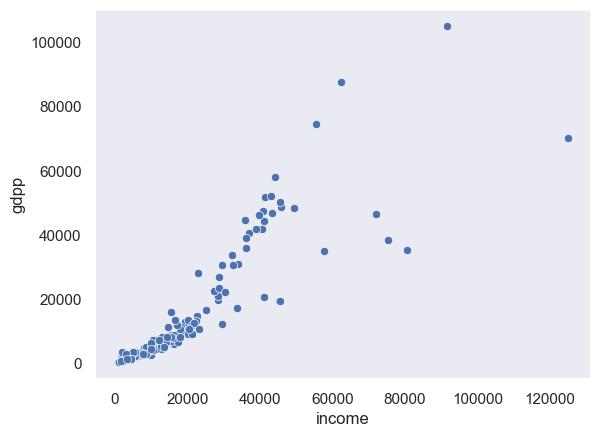

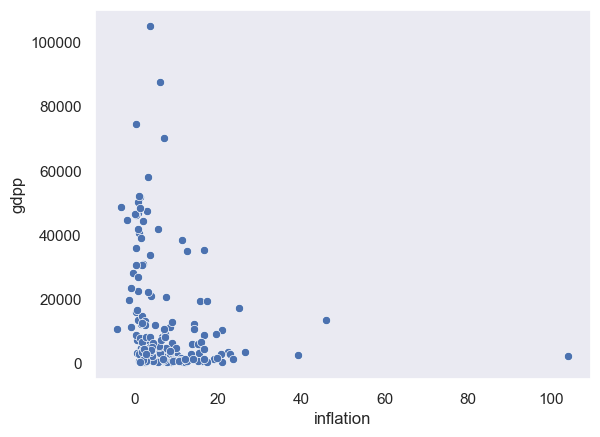

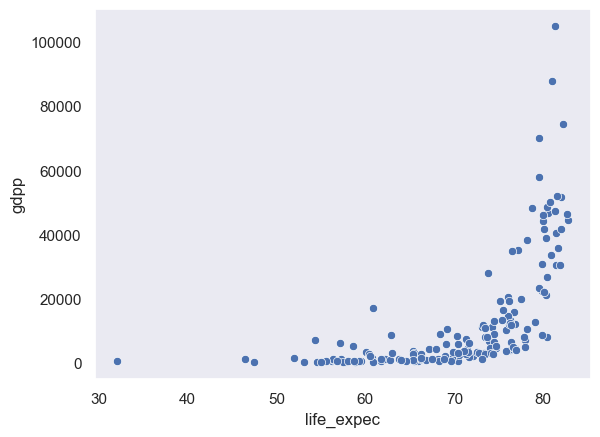

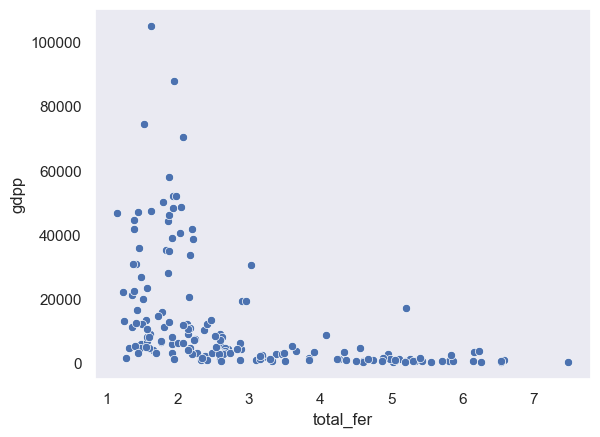

In [427]:
for col in df.columns:
    if col != 'gdpp':  # Check if the column is not 'gdpp'
        sns.scatterplot(data=df, x=col, y='gdpp')
        plt.show()

In [428]:
# Assuming the dataset is stored in a pandas DataFrame called 'df'
feature_names = df.columns.tolist()

# Print the feature names
print(feature_names)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


## Normalising the data in DataFrame

In [429]:
scaler = MinMaxScaler() # Create a MinMaxScaler object

# Normalise the data using the MinMaxScaler
normalised_data = scaler.fit_transform(df)

# In unsupervised learning, the input consists solely of features without any corresponding labels

## Applying the K-means algorithm (elbow method), determine the optimal number of clusters (k)
Target locate the point where the plot bends


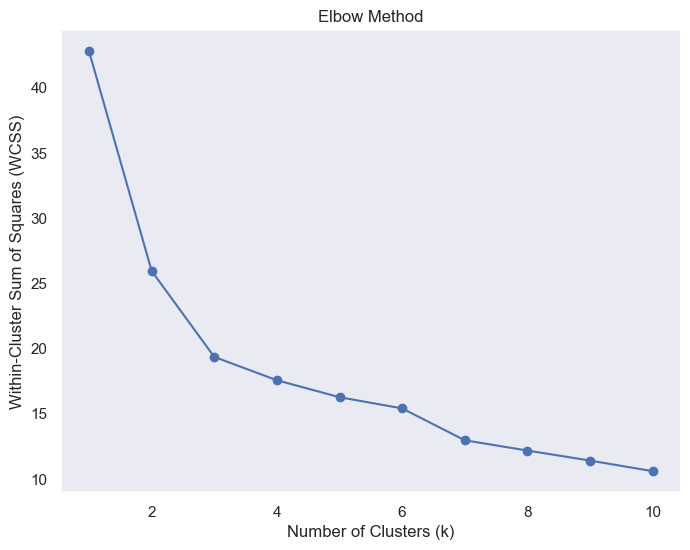

In [430]:
wcss = [] # Create an empty list to hold the values representing the Within-Cluster Sum of Squares (WCSS)
k_range = range(1, 11) # Define the range of k values

# Iterate through each value of k
for k in k_range:
    # Create a KMeans object with the current k value and a fixed random state
    kmeans = KMeans(n_clusters=k, random_state=42) # Start the KMeans algorithm with the existing value of k
    kmeans.fit(normalised_data)# Fit the KMeans model to the data
    wcss.append(kmeans.inertia_)# Append the WCSS value to the list

# Plot Elbow Method to determine number of clusters

plt.figure(figsize=(8, 6)) # Create figure with specified dimensions
plt.plot(k_range, wcss, marker='o') # Plot the WCSS values against the number of clusters (k)
plt.xlabel('Number of Clusters (k)') # Set x-axis label
plt.ylabel('Within-Cluster Sum of Squares (WCSS)') # Set y-axis label
plt.title('Elbow Method') # Set the title
# Display the plot
plt.show()

## Applying the K-means algorithm (silhouette method), determine the optimal number of clusters (k)
Target locate the higest point

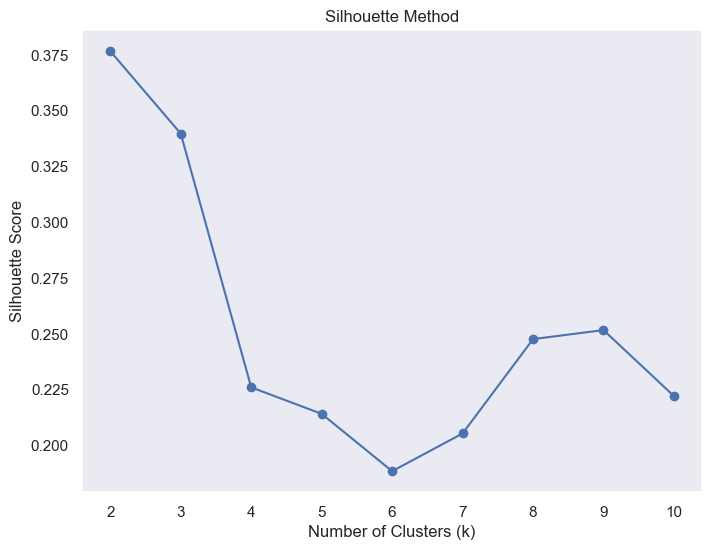

In [431]:
silhouette_scores = []  # List to store silhouette scores
k_range = range(2, 11)  # Create a range of k values to test starting at 2

# Iterate through each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Start the KMeans algorithm with the existing value of k
    kmeans.fit(normalised_data)  # Fit the KMeans model on the data
    labels = kmeans.labels_  # Get cluster labels
    silhouette_scores.append(silhouette_score(normalised_data, labels))  # Calculate silhouette score and add it to the list.

# Plot silhouette scores against number of clusters
plt.figure(figsize=(8, 6))  # Create a figure with the specified size
plt.plot(k_range, silhouette_scores, marker='o')  # Plot silhouette scores against number of clusters
plt.xlabel('Number of Clusters (k)')  # Set x-axis label
plt.ylabel('Silhouette Score')  # Set y-axis label
plt.title('Silhouette Method')  # Set title
plt.show()  # Display the plot

## Choose the optimal number of clusters (where silhouette score is highest and elbow bends)

In [432]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 to align with k_values starting from 2
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 2


In [433]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42) # Train the KMeans model with the optimal number of clusters

kmeans.fit(normalised_data) # Fit the normalised data to the KMeans model

KMeans(n_clusters=2, random_state=42)

In [434]:
# Report the silhouette score of the model
silhouette_avg = silhouette_score(normalised_data, kmeans.labels_)
print(f'Silhouette Score of the model: {silhouette_avg}')

Silhouette Score of the model: 0.37671430588173554


## The model's silhouette score is 0.37671430588173554
Showing that the clusters are somewhat separated. If the score was higher, it would mean the clusters are well-defined. A lower score could mean there are difficulties with clustering.

In [435]:
# Turn data back into a DataFrame
normalised_data = pd.DataFrame(normalised_data, columns=feature_names)

# Add the 'Cluster' column to the DataFrame
normalised_data['Cluster'] = kmeans.labels_

In [436]:
# Cluster sizes
normalised_data['Cluster'].value_counts()

Cluster
1    112
0     55
Name: count, dtype: int64

In [437]:
# Cluster characteristics
normalised_data.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,0.401469,0.142143,0.285044,0.250841,0.026381,0.141749,0.555998,0.573846,0.016459
1,0.061791,0.236034,0.323903,0.278226,0.185258,0.095632,0.857935,0.141055,0.173135


## Add the 'Cluster' column to the original DataFrame

In [438]:
# Interpret the results more easily
original_data['cluster'] = kmeans.labels_

In [439]:
# Checking the Original DataFrame with new Cluster column
original_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


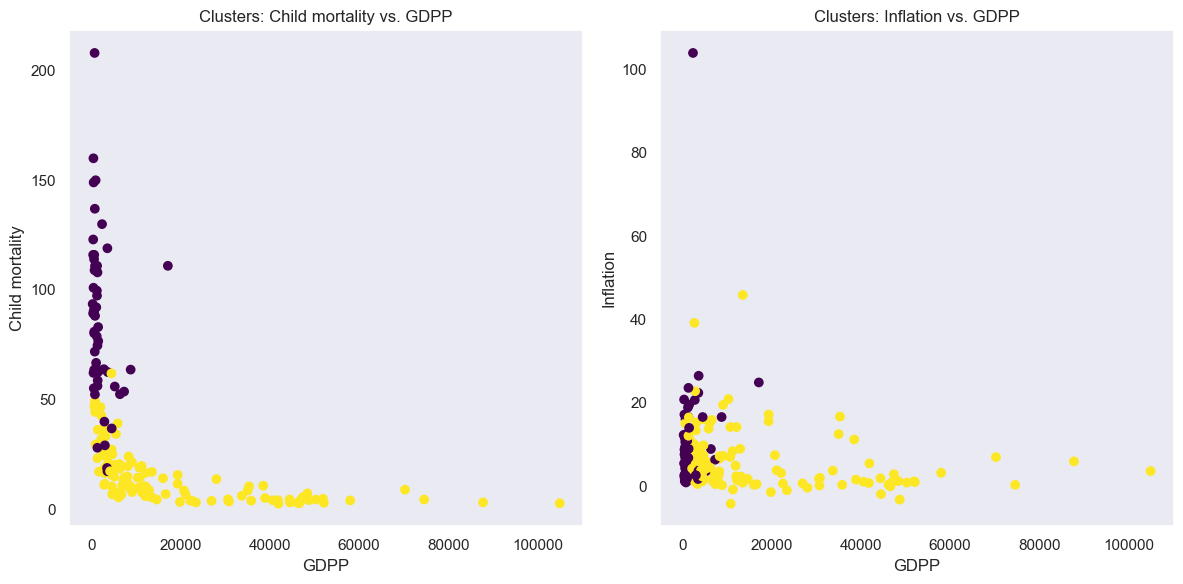

In [440]:
# Visualise the clusters for Child mortality vs. GDP and Inflation vs. GDP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(original_data['gdpp'], original_data['child_mort'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.title('Clusters: Child mortality vs. GDPP')

plt.subplot(1, 2, 2)
plt.scatter(original_data['gdpp'], original_data['inflation'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.title('Clusters: Inflation vs. GDPP')

plt.tight_layout()
plt.show()

# Mapping Cluster Names to Quality of Life Column

In [441]:
# Define a dictionary to map cluster labels to quality of life categories
cluster_names = {
    0: 'low',
    1: 'high'
}

# Rename the 'cluster' column to 'quality_of_life' in the original dataset
original_data.rename(columns={'cluster': 'quality_of_life'}, inplace=True)

# Map the cluster labels to the corresponding quality of life categories
original_data['quality_of_life'] = original_data['quality_of_life'].map(cluster_names)

# Looking at DataFrame with the renamed column and renamed column values
original_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,quality_of_life
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,low
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,high
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,high
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,low
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,high


# Justification
We can study various factors that affect a country's quality of life. These factors include child mortality rate, exports, health expenditure, imports, income, inflation, life expectancy, total fertility rate, and GDP per capita. By looking at these indicators, we can get a good understanding of aspects like healthcare, economic opportunities, standard of living, and overall well-being. It makes sense to call this group of indicators "Quality of Life" because they encompass different aspects that influence how people live and their well-being in a country.